# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 2.0.10 which is incompatible.


The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [2]:
from unityagents import UnityEnvironment
import numpy as np

# select this option to load version 1 (with a single agent) of the environment
#env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726624e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [5]:
env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.06749999849125743


When finished, you can close the environment.

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

In [5]:
%load_ext autoreload
%autoreload 2
import time
import importlib
import ddpg_agent
from ddpg_agent import Agent
agent = Agent(state_size, action_size, random_seed=0)
import numpy as np
import random
import torch
from collections import namedtuple, deque
from torch.autograd import Variable
import matplotlib.pyplot as plt
from model import Actor, Critic


In [6]:
def ddpg(n_episodes = 50, max_t=1000):
    scores_window = deque(maxlen=100)
    mean_scores = []
    max_score = -np.Inf
    avg_score_100 = []
    for i_episode in range(n_episodes):
        env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
        states = env_info.vector_observations                  # get the current state (for each agent)
        scores = np.zeros(num_agents)   # initialize the score (for each agent)
        start_time = time.time()
        for t in range(max_t):
            #print("t =",t)
            actions = agent.act(states)
            
            
            
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            #print("the rewards are:", rewards)
            dones = env_info.local_done                        # see if episode finished
           # print("the dones are:", dones)
            scores += env_info.rewards                         # update the score (for each agent)
           
            for state, action, reward, next_state, done in zip(states, actions, rewards, next_states, dones):
                agent.step(state, action, reward, next_state, done, t)
            states = next_states
            scores += rewards
          
            
          #  if np.any(dones):
          #      break
        mean_scores.append(np.mean(scores))
        scores_window.append(mean_scores[-1])
        avg_score_100.append(np.mean(scores_window))    # save moving average
        eclapse_time = time.time() - start_time
        
        if i_episode % 1 ==0:
            print("\rEpisode {} ({} sec) \t Score: {:.2f} \t Average last 100 epoch score: {:.2f}".format(i_episode, round(eclapse_time), mean_scores[-1], avg_score_100[-1], end=""))
                  
        if avg_score_100[-1]>30:
          #  print("\nEvviroments solved in {:d} episodes!\tAverage Score: {:.2f}".format(i_episode,  avg_score_100[-1]))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
    return mean_scores, avg_score_100


Episode 0 (140 sec) 	 Score: 2.61 	 Average last 100 epoch score: 2.61
Episode 1 (145 sec) 	 Score: 5.31 	 Average last 100 epoch score: 3.96
Episode 2 (146 sec) 	 Score: 8.91 	 Average last 100 epoch score: 5.61
Episode 3 (146 sec) 	 Score: 16.39 	 Average last 100 epoch score: 8.31
Episode 4 (149 sec) 	 Score: 30.15 	 Average last 100 epoch score: 12.67
Episode 5 (153 sec) 	 Score: 32.68 	 Average last 100 epoch score: 16.01
Episode 6 (157 sec) 	 Score: 38.46 	 Average last 100 epoch score: 19.22
Episode 7 (157 sec) 	 Score: 35.89 	 Average last 100 epoch score: 21.30
Episode 8 (160 sec) 	 Score: 36.60 	 Average last 100 epoch score: 23.00
Episode 9 (162 sec) 	 Score: 46.66 	 Average last 100 epoch score: 25.37
Episode 10 (165 sec) 	 Score: 44.65 	 Average last 100 epoch score: 27.12
Episode 11 (169 sec) 	 Score: 47.42 	 Average last 100 epoch score: 28.81
Episode 12 (173 sec) 	 Score: 52.93 	 Average last 100 epoch score: 30.67
Episode 13 (177 sec) 	 Score: 54.28 	 Average last 100 

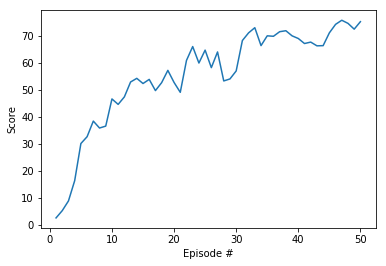

In [7]:
#import workspace_utils.py
from workspace_utils import active_session
with active_session():
    # do long-running work here
    mean_scores, avg_score = ddpg()
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(mean_scores)+1), mean_scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

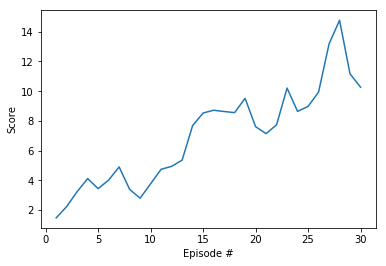

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(mean_scores)+1), mean_scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()